In [1]:
import pandas as pd
import numpy as np

In [37]:
import re

In [5]:
from sklearn.decomposition import PCA

In [84]:
import matplotlib.pyplot as plt

In [11]:
countries_data = pd.read_csv("../Data/Processed/worried_data_processed.csv", index_col= "Country Name")

In [35]:
worried_desc_path = "../Data/Processed/worried_desc.txt"
with open(worried_desc_path, "r") as f:
    worried_desc = f.read().split('\n')

In [67]:
series_desc = {}
for line in worried_desc:
    code, val = (re.search(r'\| (.*) \| (.*) \|', line)).groups()
    series_desc[code] = val

In [15]:
X = countries_data.values

# Principal Component Analysis (PCA)

In [19]:
pca = PCA(n_components = 132)
X_PCA = pca.fit_transform(X)
expl_var = np.cumsum(pca.explained_variance_ratio_)
expl_var_thresh = [0.75, 0.9, 0.95, 0.99]
# no of principal components explaining subsequent values in expl_var_tresh
pca_comp_no = []
for thresh in expl_var_thresh:
    dim_no = np.argmax(expl_var > thresh) + 1
    pca_comp_no.append(dim_no)
    print("Number of principal components which explain", thresh * 100, "% of variance:", dim_no)

Number of principal components which explain 75.0 % of variance: 1
Number of principal components which explain 90.0 % of variance: 3
Number of principal components which explain 95.0 % of variance: 7
Number of principal components which explain 99.0 % of variance: 22


### Observations on the PCA’s Explained Variance
The columns of the design matrix are correlated because of the specificity of the data. There are three main survey topics involved: concerns about day-to-day expenses, educational expenses, and money for old age. The rest of the series are stratifications of the data that may initially seem redundant, but they can provide important information about smaller effects that differentiate countries. This is reflected in the bulk of the explained variance being concentrated in the first principal component. The first two principal components together account for 88% of the variance, followed by a long tail of principal components, each explaining only a small fraction of the variance.

## PCA Loadings

In [82]:
# The variables which contribute the most to the first principal component
# loading : variable description
indices =np.flip(np.argsort(np.abs(pca.components_[0,:])))
loop_cnt = 50
for i in indices:
    print(pca.components_[0,:][i], ":", series_desc[countries_data.columns[i]])
    loop_cnt -= 1
    if loop_cnt == 0:
        break

0.1307274597908873 : Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried, older (% age 25+)
0.12891089074891332 : Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried, in labor force (% age 15+)
0.12652898484904287 : Worried about not being able to pay school fees or fees for education: very worried, income, poorest 40% (% ages 15+)
0.12635193053850904 : Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried, income, richest 60% (% ages 15+)
0.12622327989167023 : Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried, male (% age 15+)
0.12605743198638145 : Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried (% age 15+)
0.12591957771301518 : Worried about not being able to pay for medical costs in case of a seriou

### Observations on PCA Loadings
The loadings of the first principal component are roughly the same. No single variable stands out, but all variables move together according to their sign. This reflects the structure of the dataset, which stratifies the answers to three main questions. Because the percentages of each group—"very worried," "somewhat worried," and "not worried at all"—sum to 100, “very worried” moves in the opposite direction from “not worried at all.”

## PCA Visualisations

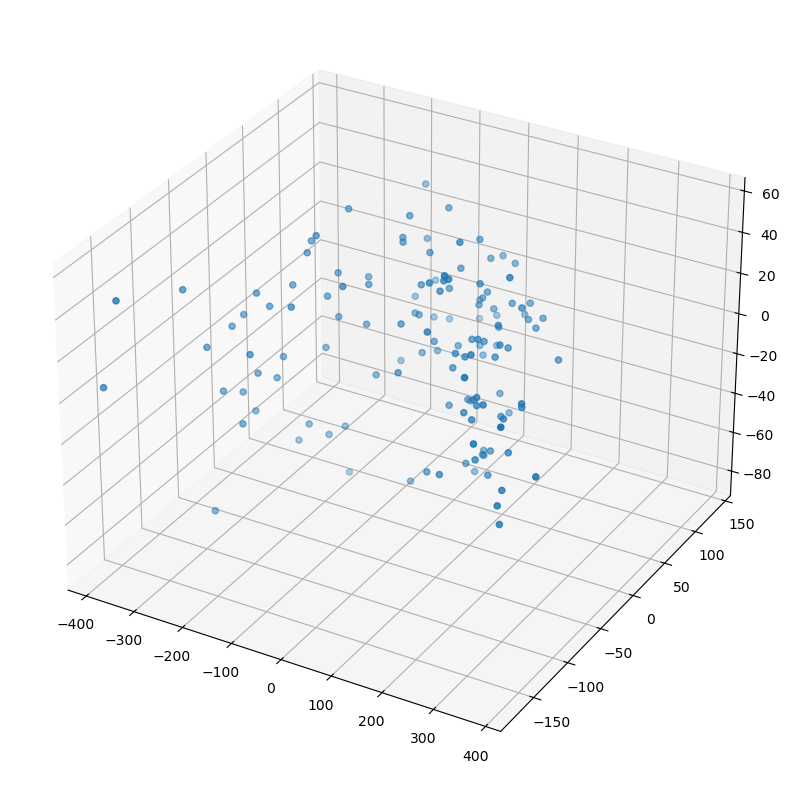

<Figure size 640x480 with 0 Axes>

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2])
plt.show()
plt.savefig("../Results/PCA3D.png")

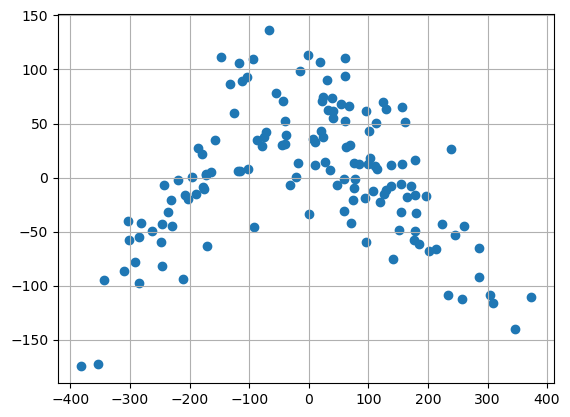

In [99]:
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.grid(True)
plt.show
plt.savefig("../Results/PCA2D.png")

### Comments on PCA Visualisations
Despite 2D and 3D visualizations not revealing any obvious clusters, I still plan to try K-means, even though the structure doesn’t suggest spherical clusters based on the visual inspection. In 3D space, the data appears as a cloud with varying densities—hence my motivation to try K-means. Meanwhile, the 2D projection looks like a crescent-shaped cloud, which is why I also want to use DBSCAN to see if it identifies boundaries along the crescent. Additionally, I intend to explore MDS and t-SNE visualizations to gain further insight into the data’s structure.

# MDS

# t-SNE